In [1]:
# https://www.openml.org/d/40536
# https://www.openml.org/d/32

import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, validation_curve, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt
from experiment import Experiment
from itertools import permutations
import warnings
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

In [2]:
# This is a special function just for MLPs so it will go here instead of the experiment class
def plotLossCurve(experiment):
    pipe = experiment.pipe
    clf = pipe.fit(experiment.X_train, experiment.y_train)
    fig, ax = plt.subplots()
    ax.set_title(f'{experiment.datasetName}: {experiment.leanerName} - Best Params Loss')
    ax.plot(clf['nn'].loss_curve_)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss/Error')
    plt.show()

In [3]:
dating_features = 120
pen_features = 16

f = dating_features
dating_layers = [
    (f, f, f),
    (f, f//2, f//2),
    (f, f//2, f//4),
    (f, f),
    (f, f//2),
    (f//2, f//4),
    (f),
    (f//2)
]

f = pen_features
pen_layers = [
    (f, f, f),
    (f, f//2, f//2),
    (f, f//2, f//4),
    (f, f),
    (f, f//2),
    (f//2, f//4),
    (f),
    (f//2)
]

alpha = [1/10**e for e in range(0, 6, 1)]
lr_init = [0.1, 0.01, 0.001, 0.0001]
activations = ['relu', 'logistic']

est_params = {
    'nn__activation': activations,
    'nn__learning_rate_init': lr_init,
    'nn__alpha': alpha
}

dating_params = dict(**est_params, nn__hidden_layer_sizes=dating_layers)
pen_params = dict(**est_params, nn__hidden_layer_sizes=pen_layers)

In [4]:
pipe1 = Pipeline(steps=[('scale', StandardScaler()), 
                       ('nn', MLPClassifier(solver='adam', max_iter=500))
                      ])
pipe2 = Pipeline(steps=[('scale', StandardScaler()), 
                        ('impute', SimpleImputer()),
                       ('nn', MLPClassifier(solver='adam', max_iter=500))
                      ])

pen_experiment = Experiment('ANN', 32, 'Pen digits', pipe1, pen_params, validationCurveParams=[
    ('nn__learning_rate_init', 'Initial Learning Rate', 'log'),
    ('nn__alpha', 'Regularization Parameter', 'log')
], reshape=False, multiplot_params=('nn__activation', activations))

dating_experiment = Experiment('ANN', 40536, 'Speed Dating', pipe2, dating_params, validationCurveParams=[
    ('nn__learning_rate_init', 'Initial Learning Rate', 'log'),
    ('nn__alpha', 'Regularization Parameter', 'log')
], reshape=False, multiplot_params=('nn__activation', activations))

ann_experiments = {'pen': pen_experiment, 'date': dating_experiment}

ANN on Speed Dating training took 1:59:54.659632
ANN on Speed Dating Test Score: 0.8620525059665871


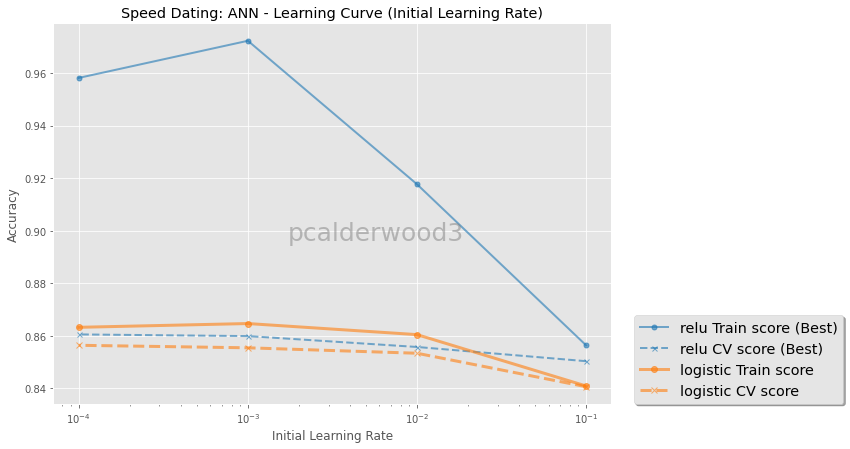

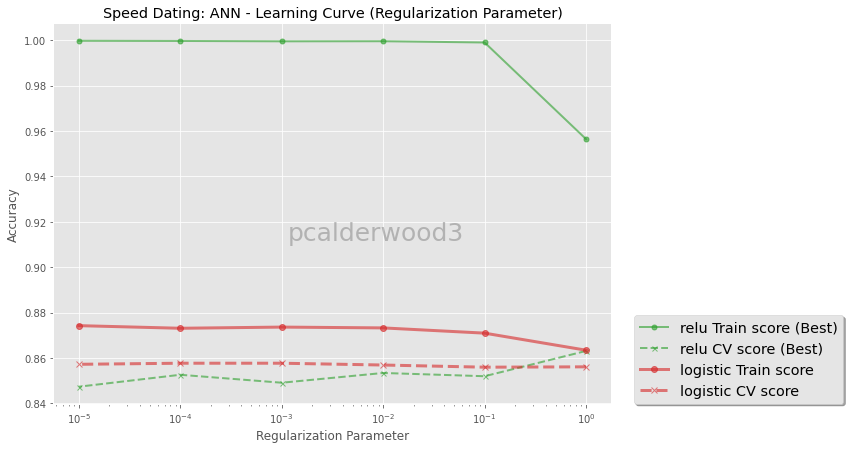

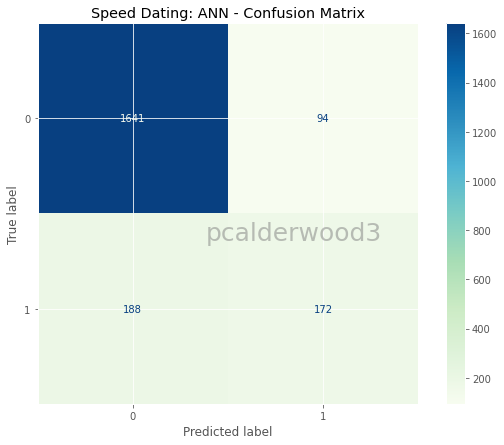

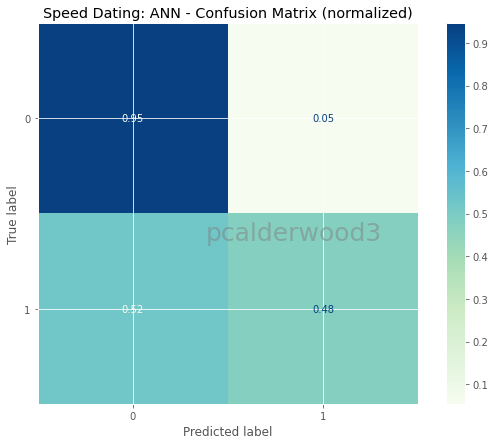

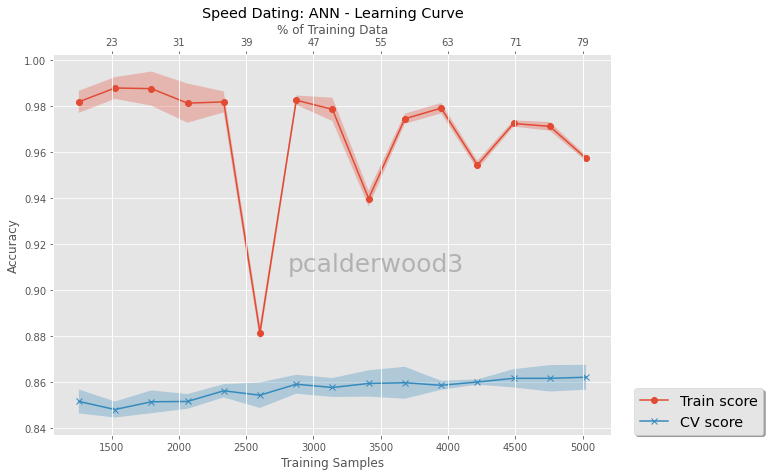

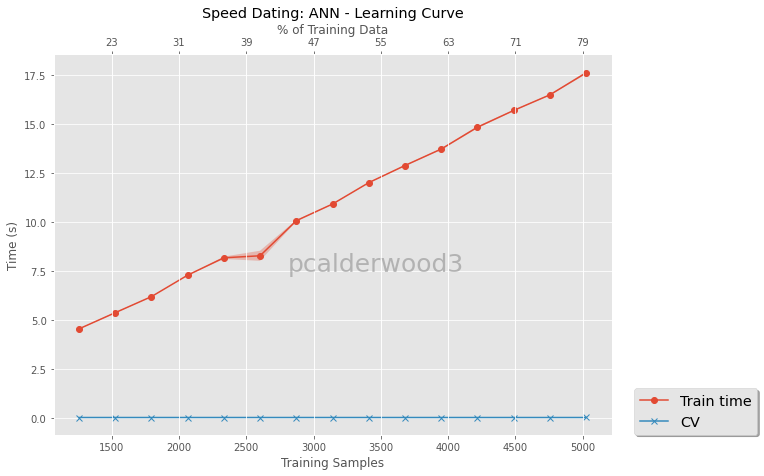

Best parameters took 0:00:20.503293 to train


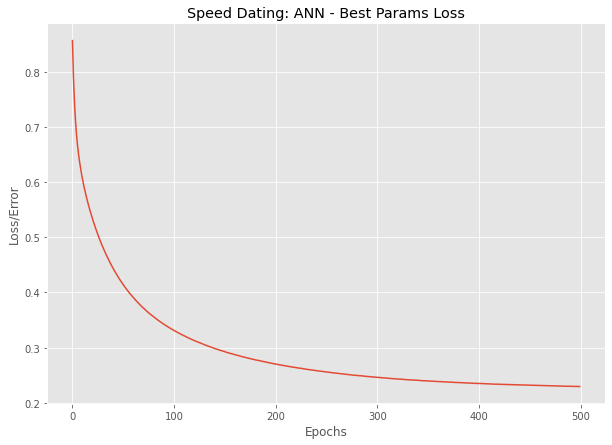

In [5]:
with warnings.catch_warnings(): # some models are too simple and do not converge to the stop error in time.
    warnings.simplefilter("ignore") 
    dating_experiment.run()
    dating_experiment.plotValidation()
    dating_experiment.plotConfusion()
    dating_experiment.plotLearningCurve()
    dating_experiment.measureFitTime()
    plotLossCurve(dating_experiment)

In [6]:
print(f'Top 5 params for {dating_experiment.datasetName} using {dating_experiment.leanerName}')
for p in dating_experiment.topParams(5):
    print(p)

Top 5 params for Speed Dating using ANN
(0.8642375943126137, {'nn__activation': 'relu', 'nn__alpha': 1.0, 'nn__hidden_layer_sizes': 120, 'nn__learning_rate_init': 0.0001})
(0.8618496926764261, {'nn__activation': 'relu', 'nn__alpha': 1.0, 'nn__hidden_layer_sizes': 60, 'nn__learning_rate_init': 0.001})
(0.8613717323117929, {'nn__activation': 'logistic', 'nn__alpha': 0.001, 'nn__hidden_layer_sizes': (120, 120), 'nn__learning_rate_init': 0.0001})
(0.8608938986262915, {'nn__activation': 'logistic', 'nn__alpha': 0.0001, 'nn__hidden_layer_sizes': (120, 120), 'nn__learning_rate_init': 0.0001})
(0.8605761873635032, {'nn__activation': 'logistic', 'nn__alpha': 1e-05, 'nn__hidden_layer_sizes': (60, 30), 'nn__learning_rate_init': 0.0001})


ANN on Pen digits training took 0:18:39.698503
ANN on Pen digits Test Score: 0.9905385735080058


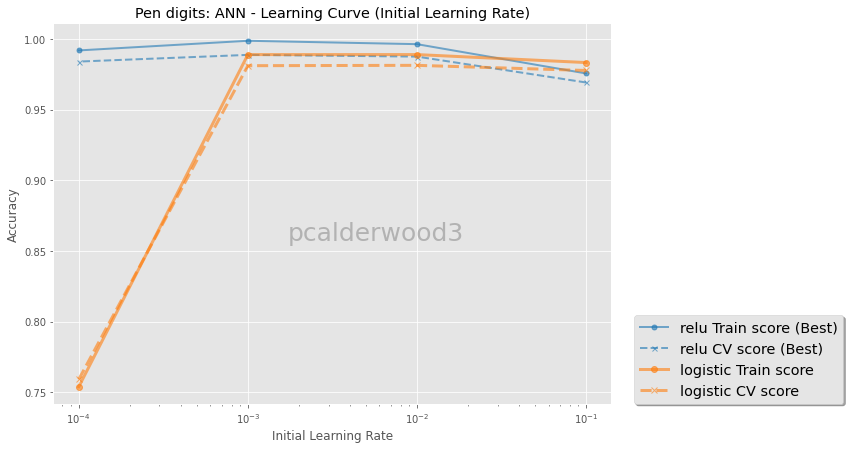

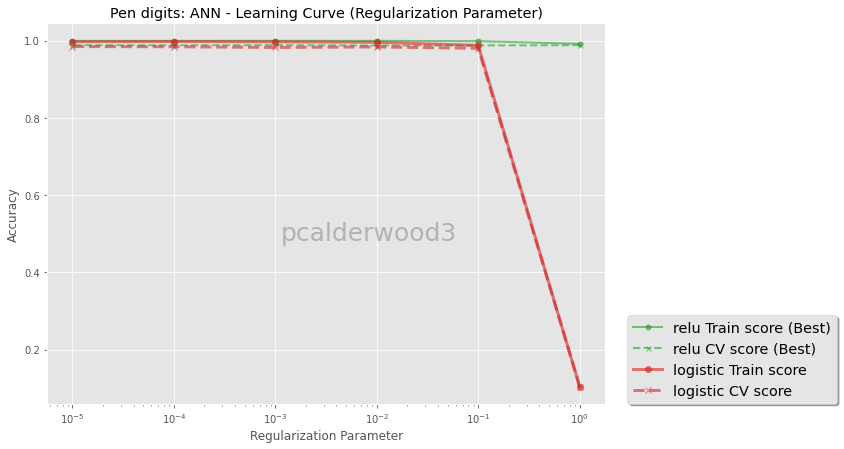

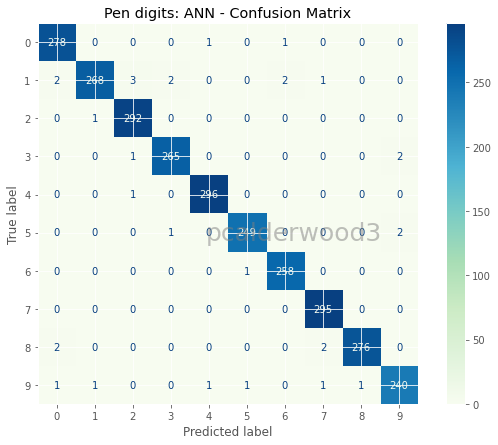

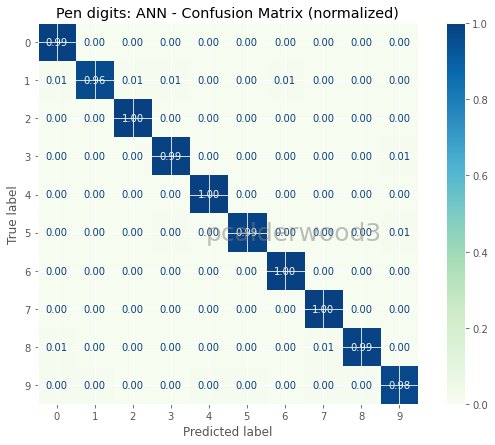

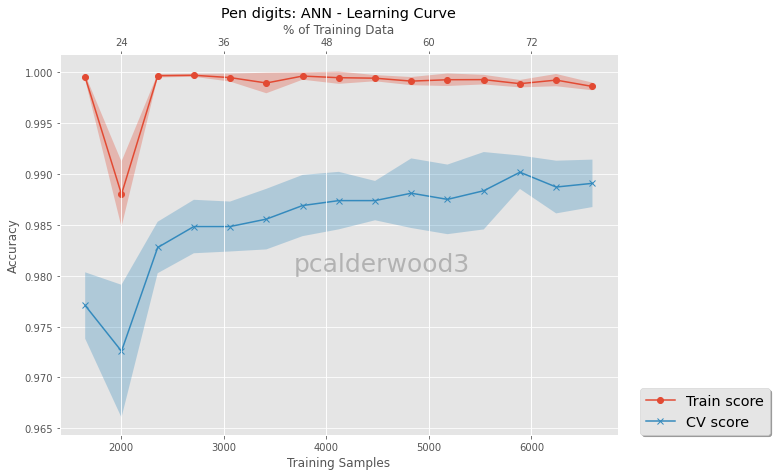

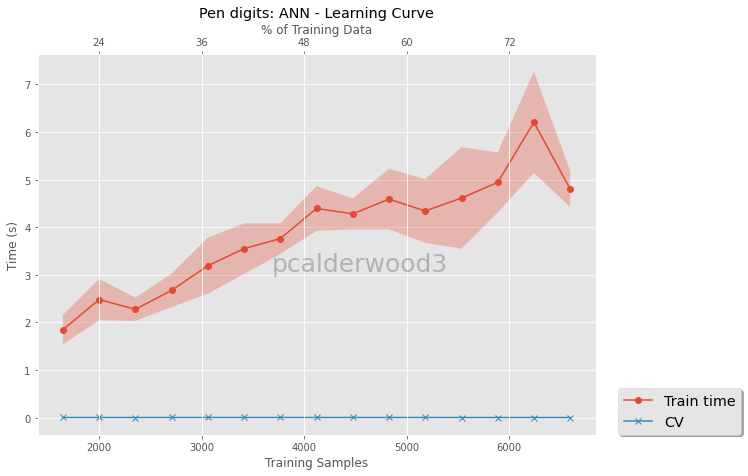

Best parameters took 0:00:04.429632 to train


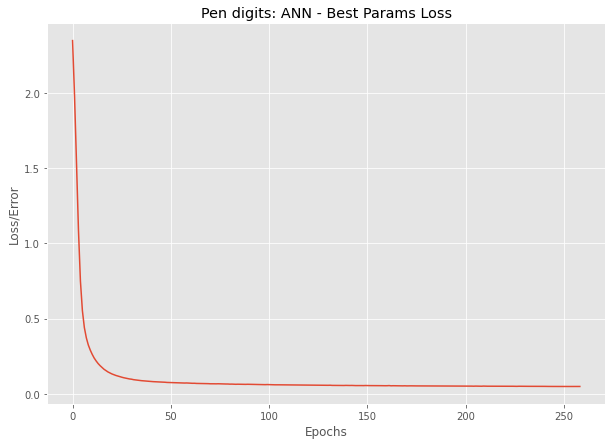

In [7]:
with warnings.catch_warnings(): # some models are too simple and do not converge to the stop error in time.
    warnings.simplefilter("ignore") 
    pen_experiment.run()
    pen_experiment.plotValidation()
    pen_experiment.plotConfusion()
    pen_experiment.plotLearningCurve()
    pen_experiment.measureFitTime()
    plotLossCurve(pen_experiment)

In [8]:
print(f'Top 5 params for {pen_experiment.datasetName} using {pen_experiment.leanerName}')
for p in pen_experiment.topParams(5):
    print(p)

Top 5 params for Pen digits using ANN
(0.9916304085441604, {'nn__activation': 'relu', 'nn__alpha': 0.1, 'nn__hidden_layer_sizes': (16, 16, 16), 'nn__learning_rate_init': 0.001})
(0.9910238332145991, {'nn__activation': 'relu', 'nn__alpha': 0.1, 'nn__hidden_layer_sizes': (16, 16), 'nn__learning_rate_init': 0.01})
(0.9909027683738895, {'nn__activation': 'relu', 'nn__alpha': 0.1, 'nn__hidden_layer_sizes': (16, 16), 'nn__learning_rate_init': 0.001})
(0.9898110505337157, {'nn__activation': 'relu', 'nn__alpha': 0.0001, 'nn__hidden_layer_sizes': 16, 'nn__learning_rate_init': 0.001})
(0.9896893969278233, {'nn__activation': 'relu', 'nn__alpha': 0.1, 'nn__hidden_layer_sizes': 16, 'nn__learning_rate_init': 0.01})
